In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from SBS import SBS

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

In [7]:
import matplotlib.pyplot as plt

[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


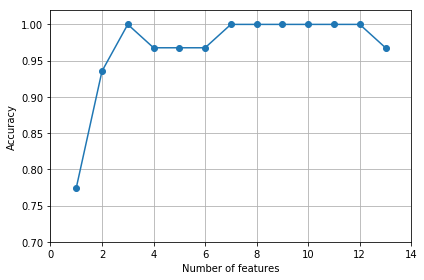

In [8]:
k_feat = [len(k) for k in sbs.subsets_]
print(k_feat)
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlim([0, 14])
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Int64Index([1, 2, 12], dtype='int64')


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
import numpy as np

In [19]:
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

In [20]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
 6) 11                             0.058739
 7) 6                              0.050872
 8) 5                              0.031357
 9) 2                              0.025648
10) 9                              0.025570
11) 4                              0.022366
12) 8                              0.013354
13) 3                              0.013279


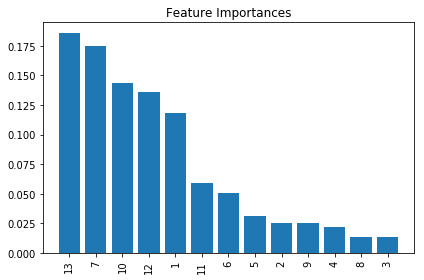

In [21]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()